# Análise do Diabetes Dataset

Iremos utilizar um conjunto de dados de doenças cardíacas pra treinar um modelo de regressão linear.

## 1. Importando Bibliotecas Necessárias


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# 2. Carregar o Conjunto de Dados Diabetes
usaremos a função `load_diabetes` do módulo datasets da biblioteca sklearn pra carregar os dados


In [3]:
diabetes = datasets.load_diabetes()
features = diabetes.data
targets = diabetes.target

# 3. Criar um DataFrame com os Dados

Vamos criar um dataframe com os dados e adicionar a coluna de targets (progresso da diabetes)


In [4]:
df = pd.DataFrame(data=features, columns=diabetes.feature_names)
df['progression'] = targets  #coluna targets

# 4. Visualizar os Primeiros Registros do DataFrame

Iremos exibir os dados do dataframe

In [5]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progression  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  


# 5. Calcular a Soma das Características

Vai ser feita a soma das características pra cada observação


In [6]:
features_all = np.sum(features, axis=1).reshape(-1, 1)  #a soma das características

# 6. Criar e Treinar o Modelo de Regressão Linear

Iremos agora criar e treinar o modelo de regressão linear usando as características somadas


In [7]:
model = LinearRegression()
model.fit(features_all, targets)


LinearRegression()

# 7. Fazer Previsões

Iremos fazer previsões usando o modelo treinado.


In [8]:
predictions = model.predict(features_all)


# 8. Obter Coeficientes

Aqui, nós obtivemos os coeficientes do modelo.


In [9]:
coef_angular = model.coef_[0]
coef_linear = model.intercept_

print(f"Coeficiente angular (slope): {coef_angular}")
print(f"Coeficiente linear (intercepto): {coef_linear}")


Coeficiente angular (slope): 149.18591548135063
Coeficiente linear (intercepto): 152.13348416289597


# 9. Criar o Gráfico

Vamos criar um gráfico de dispersão dos dados reais e a linha de regressão.


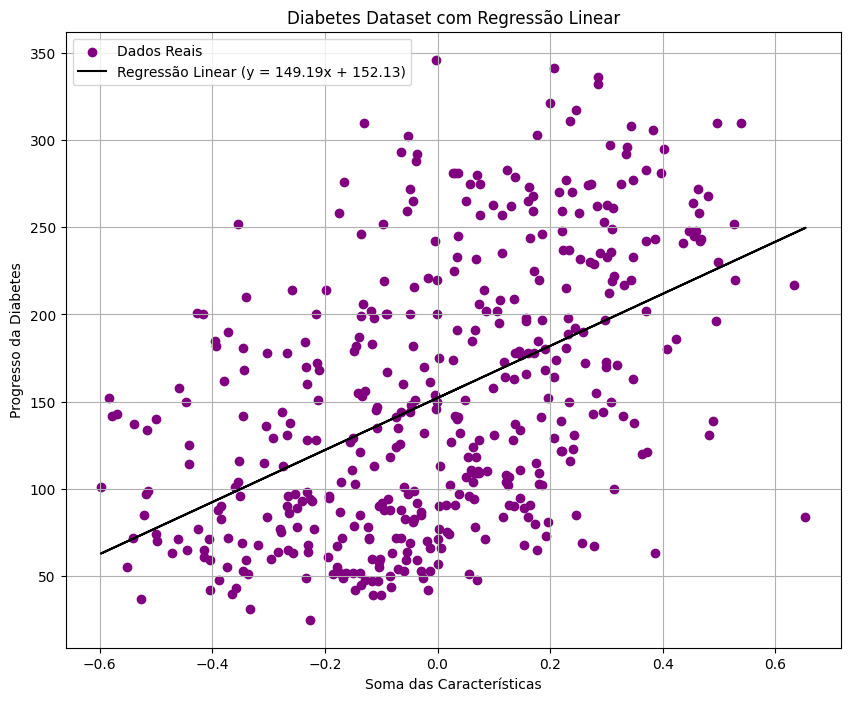

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(features_all, targets, color='purple', alpha=1.0, label='Dados Reais')
plt.plot(features_all, predictions, color='black', label=f'Regressão Linear (y = {coef_angular:.2f}x + {coef_linear:.2f})')

plt.title("Diabetes Dataset com Regressão Linear")
plt.xlabel("Soma das Características")
plt.ylabel("Progresso da Diabetes")
plt.legend()
plt.grid()
plt.show()

# 10. Fazer uma Nova Previsão

Faremos uma nova previsão com um exemplo de soma das características.


In [11]:
novo_valor = [[5]]  # Exemplo de soma das features
y_pred = model.predict(novo_valor)
print(f"Para soma das características {novo_valor[0][0]}, o valor de Y é: {y_pred[0]}")


Para soma das características 5, o valor de Y é: 898.0630615696491
